In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

### 68-95-99.7ルール

In [10]:
group1 = []
group2 = []
group3 = []
samples = []
loc = 4
scale = 3

for i in range(10000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [11]:
print(len(group1)/len(samples))
print((len(group1)+len(group2))/len(samples))
print((len(group1)+len(group2)+len(group3))/len(samples))

0.6829
0.9555
0.9974


### 標準化

In [4]:
scaler = StandardScaler()

In [6]:
scaler.fit_transform([[1], [2], [3], [4]]) # 2次元のデータを引数にする必要がある

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [11]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [25]:
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1)) # 244行1列のデータにしてくれる※reshapeは2次元化するために必要
scaled

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [26]:
scaled *10 + 50

array([[ 33.36981828],
       [ 49.95717657],
       [ 50.94914672],
       [ 46.5507406 ],
       [ 47.70375032],
       [ 54.17363756],
       [ 61.03379478],
       [ 42.66063856],
       [ 44.99836433],
       [ 59.47315739],
       [ 50.93553526],
       [ 46.88272423],
       [ 40.3216191 ],
       [ 50.32413406],
       [ 57.02885077],
       [ 53.42053237],
       [ 50.14151189],
       [ 60.98406513],
       [ 57.45627991],
       [ 50.23381346],
       [ 60.97282376],
       [ 45.85412481],
       [ 46.81774845],
       [ 55.16606793],
       [ 49.94116426],
       [ 45.17355156],
       [ 48.16004664],
       [ 49.47525348],
       [ 56.12895542],
       [ 48.665917  ],
       [ 48.52820785],
       [ 45.9698051 ],
       [ 56.30066304],
       [ 43.04511479],
       [ 53.79214012],
       [ 48.16616736],
       [ 43.73579175],
       [ 53.36888626],
       [ 43.8951679 ],
       [ 49.8515239 ],
       [ 46.52948726],
       [ 47.48515471],
       [ 59.63290777],
       [ 45

In [19]:
scaler.fit_transform(df[['total_bill', 'tip_rate']]) 

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

### 二項分布(Binomial Distribution)

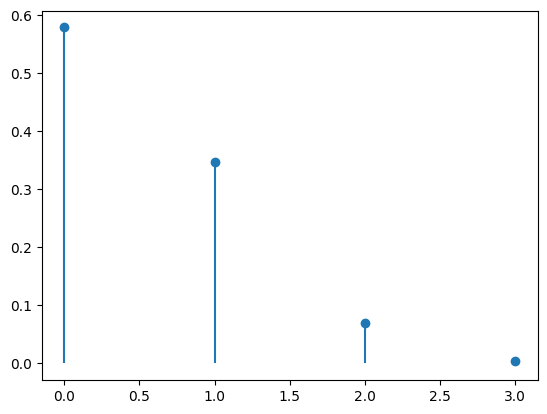

In [31]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

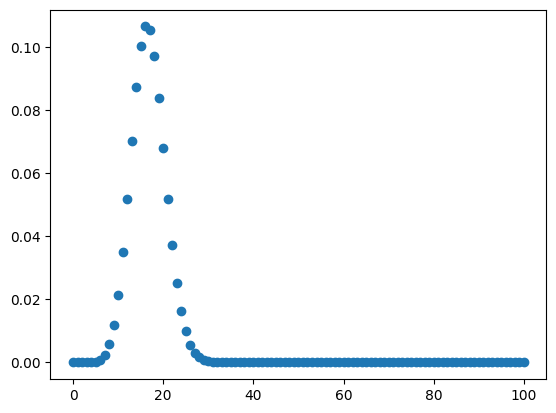

In [37]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')

In [39]:
# 平均=npの検算
stats.binom(n, p).mean()

16.666666666666664

In [40]:
n*p

16.666666666666664

In [41]:
stats.binom(n, p).var()

13.888888888888888

In [43]:
n*p*(1-p)

13.888888888888888

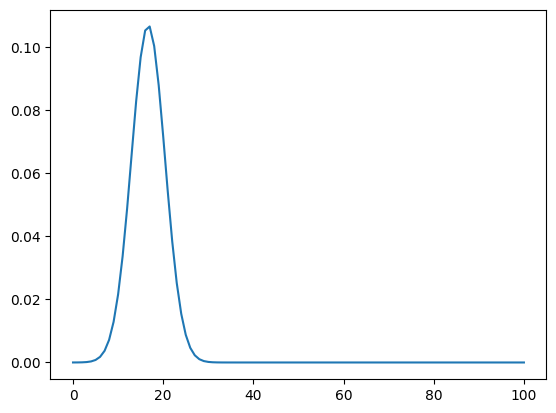

In [45]:
# n→∞で正規分布になることの確認
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)